In [1]:
import codecs
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

In [2]:
# 예제 12-1

def read_data(fin, delim):
    info_li = []

    for line in codecs.open(fin,"r",encoding="latin-1"):
        line_items = line.strip().split(delim)
        #print(line_items)

        key = int(line_items[0])
        if (len(info_li)+1)!=key:
            print('errors at data_id')
            exit(0)
        info_li.append(line_items[1:])
        
    print('rows in %s: %d'%(fin, len(info_li)))


    return(info_li)

In [3]:
fin_user= "u.user"
fin_movie= "u.item"
fin_rating= "u.data"

In [4]:
user_info_li = read_data(fin_user,'|')
movie_info_li = read_data(fin_movie,'|')

rows in u.user: 943
rows in u.item: 1682


In [5]:
# 예제 12-2 무비렌즈의 별점 정보 파일을 이용하여 유틸리티 행렬 만들기
def read_rating_data(fin):

    Q = np.zeros((len(user_info_li), len(movie_info_li)), dtype=np.float64)

    for line in open(fin):
        user, movie, rating, date = line.strip().split("\t")
        user_index = int(user)-1
        movie_index = int(movie)-1

        Q[user_index,movie_index]= float(rating)

    return(Q)

In [6]:
R=read_rating_data(fin_rating)

In [7]:
# 예제 12-3 사용자의 평균 별점 기초 통계량 구하기
user_mean_li=[]
for i in range(0,R.shape[0]):
    user_rating = [x for x in R[i] if x>0.0]
    user_mean_li.append(stats.describe(user_rating).mean)

In [8]:
stats.describe(user_mean_li)

DescribeResult(nobs=943, minmax=(1.4919540229885058, 4.8695652173913047), mean=3.5881911071848003, variance=0.19823286521146211, skewness=-0.44416521432016465, kurtosis=0.9286813229088393)

In [9]:
# 예제 12-4 각 영화의 평균 별점 기초 통계량 구하기
movie_mean_li=[]
for i in range(0,R.shape[1]):
    R_T = R.T
    movie_rating = [x for x in R_T[i] if x>0.0]
    movie_mean_li.append(stats.describe(movie_rating).mean)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3146: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [10]:
stats.describe(movie_mean_li)

DescribeResult(nobs=1682, minmax=(1.0, 5.0), mean=3.0760445083251788, variance=0.61099475027975136, skewness=-0.6991282361538707, kurtosis=0.4442028070725441)

In [11]:
# 추가된 파일. 영화 플롯을 읽어옵니다. 예제 12-5, 12-6을 대체합니다.
from sklearn.feature_extraction.text import TfidfVectorizer

movie_plot_li =[]
for line in open('ml-100k-plot.txt'):
    try:
        ml_id, plot =line.strip().split('|',1)
        movie_plot_li.append(plot)
            
    except ValueError:
        movie_plot_li.append('')
print(len(movie_plot_li))

vectorizer = TfidfVectorizer(min_df=3, stop_words='english')
X = vectorizer.fit_transform(movie_plot_li[:100])
# TF-IDF로 변환한 키워드의 리스트
# X의 0번 열에 해당하는 키워드가 feature_names[0]의 키워드입니다.
feature_names = vectorizer.get_feature_names()

1682


In [12]:
print(feature_names)

['27', 'able', 'accident', 'action', 'affair', 'agent', 'alive', 'america', 'american', 'amy', 'army', 'arrival', 'asked', 'away', 'based', 'beautiful', 'befriends', 'begins', 'believes', 'bloody', 'blue', 'bond', 'boss', 'boy', 'breaks', 'bring', 'brother', 'brothers', 'brought', 'bruce', 'called', 'calls', 'car', 'case', 'charles', 'charlie', 'christmas', 'chronicles', 'city', 'class', 'come', 'comedy', 'comes', 'commit', 'company', 'continue', 'convenience', 'convicted', 'country', 'crime', 'criminal', 'cruel', 'dark', 'daughter', 'day', 'days', 'deadly', 'dealing', 'death', 'decide', 'decides', 'desert', 'despite', 'discovers', 'does', 'doesn', 'dr', 'dreams', 'drug', 'earlier', 'edward', 'efforts', 'emotional', 'emotions', 'empire', 'end', 'ends', 'escape', 'especially', 'eve', 'eventually', 'ex', 'extremely', 'face', 'fall', 'falls', 'family', 'famous', 'fate', 'father', 'favorite', 'fbi', 'fellow', 'fight', 'figure', 'filled', 'film', 'finding', 'finds', 'forces', 'france', 'fre

In [13]:
# 예제 12-7 사용자 정의 토크나이저 만들기
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
class LemmaTokenizer(object):
    def __init__(self):
        self.tokenizer = RegexpTokenizer('(?u)\w\w+')
        # TfidfVectorizer와 같은 방식으로 키워드를 가져옵니다.
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        return([self.wnl.lemmatize(t) for t in self.tokenizer.tokenize(doc)])

# 사이킷런에 위에서 정의한 토크나이저를 입력으로 넣습니다.
vectorizer2 =TfidfVectorizer(min_df=3,tokenizer=LemmaTokenizer(),stop_words='english')
X = vectorizer2.fit_transform(movie_plot_li[:100])
feature_names = vectorizer2.get_feature_names()

In [14]:
print(feature_names)

['27', 'able', 'accident', 'action', 'affair', 'agent', 'alive', 'america', 'american', 'amy', 'army', 'arrival', 'asked', 'attempt', 'away', 'based', 'beautiful', 'befriends', 'begin', 'belief', 'bloody', 'blue', 'body', 'bond', 'bos', 'boy', 'break', 'bring', 'brother', 'brought', 'bruce', 'called', 'car', 'case', 'cause', 'challenge', 'character', 'charles', 'charlie', 'christmas', 'chronicle', 'city', 'class', 'close', 'come', 'comedy', 'commit', 'company', 'contact', 'continue', 'convenience', 'convicted', 'cop', 'country', 'crime', 'criminal', 'cruel', 'dark', 'daughter', 'day', 'deadly', 'dealing', 'death', 'decide', 'decides', 'desert', 'despite', 'detective', 'director', 'discovers', 'doe', 'doesn', 'dollar', 'dr', 'dream', 'drug', 'earlier', 'edward', 'effort', 'emotion', 'emotional', 'empire', 'encounter', 'end', 'escape', 'especially', 'eve', 'eventually', 'ex', 'extremely', 'face', 'fall', 'family', 'famous', 'fate', 'father', 'favorite', 'fbi', 'fellow', 'fight', 'figure'

In [15]:
# 예제 12-8 비슷한 영화 추천하기
from sklearn.metrics.pairwise import cosine_similarity
movie_sim = cosine_similarity(X)
def similar_recommend_by_movie_id(movielens_id):
    movie_index = movielens_id-1
    # enumerate 함수로 [(리스트 인덱스 0, 유사도 0), (리스트 인덱스 1, 유사도 1)...]의
    # 리스트를 만듭니다. 그 후 각 튜플의 두 번째 항목, 즉 유사도를 이용하여 내림차순 정렬합니다.
    # 이렇게 만든 리스트의 가장 앞 튜플의 첫 번째 항목이 영화 ID가 됩니다.
    similar_movies = sorted(list(enumerate(movie_sim[movie_index])),key=lambda x:x[1], reverse=True)
    recommended=1
    print("-----recommendation for movie %d------"%(movielens_id))
    for movie_info in similar_movies[1:6]:
        # 주어진 영화와 가장 비슷한 영화는 그 영화 자신이므로 출력 시 제외합니다.
        movie_title= movie_info_li[movie_info[0]]
        print('rank %d recommendation:%s'%(recommended,movie_title[0]))
        recommended+=1

In [16]:
similar_recommend_by_movie_id(1)

-----recommendation for movie 1------
rank 1 recommendation:Shawshank Redemption, The (1994)
rank 2 recommendation:Aladdin (1992)
rank 3 recommendation:What's Eating Gilbert Grape (1993)
rank 4 recommendation:Searching for Bobby Fischer (1993)
rank 5 recommendation:Firm, The (1993)


In [41]:
# 예제 12-9 교대 최소제곱법 구현하기

from sklearn.metrics import mean_squared_error
import numpy as np
def compute_ALS(R, n_iter, lambda_, k):
    '''임의의 사용자 요인 행렬 X와 임의의 영화 요인 행렬 Y를 생성한 뒤
    교대 최소제곱법을 이용하여 유틸리티 행렬 R을 근사합니다.
    R(ndarray) : 유틸리티 행렬
    lambda_(float) : 정규화 파라미터입니다.
    n_iter(fint) : X와 Y의 갱신 횟수입니다.
    '''
    m, n =R.shape
    X = np.random.rand(m, k)
    Y = np.random.rand(k, n)

    # 각 갱신 때마다 계산한 에러를 저장합니다.
    errors =[]
    for i in range(0, n_iter):
        # [식 6-4]를 구현했습니다.
        # 넘파이의 eye 함수는 파라미터 a를 받아 a x a 크기의 단위행렬을 만듭니다.
        X = np.linalg.solve(np.dot(Y, Y.T) + lambda_ * np.eye(k), np.dot(Y, R.T)).T
        Y = np.linalg.solve(np.dot(X.T, X) + lambda_ * np.eye(k), np.dot(X.T, R))
        
        errors.append(mean_squared_error(R, np.dot(X, Y)))
        
        if i % 10 == 0:
            print('iteration %d is completed'%(i))
            #print(mean_squared_error(R, np.dot(X, Y)))
        
    R_hat = np.dot(X, Y)
    print('Error of rated movies: %.5f'%(mean_squared_error(R, np.dot(X, Y))))
    return(R_hat, errors)

In [42]:
R_hat, errors = compute_ALS(R, 20, 0.1,100)

iteration 0 is completed
iteration 10 is completed
Error of rated movies: 0.24658


In [19]:
W = R>0.0
W[W == True] = 1
W[W == False] = 0
W = W.astype(np.float64, copy=False)

In [32]:
# 예제 12-10 가중치 교대 최소제곱법 구현하기 

def compute_wALS(R,W, n_iter, lambda_, k):
    m,n = R.shape
    X = np.random.rand(m, k)
    Y = np.random.rand(k, n)
    weighted_errors = []
    
    # [예제 12-9]와 달리 가중치 행렬을 넣어서 계산합니다.
    for ii in range(n_iter):
        # 각 사용자와 영화의 가중치 행렬을 이용하여 X와 Y를 갱신합니다.
        for u, Wu in enumerate(W):
            X[u,:] = np.linalg.solve(np.dot(Y, np.dot(np.diag(Wu), Y.T)) +lambda_ * np.eye(k), np.dot(Y, np.dot(np.diag(Wu),R[u,:].T))).T
        for i, Wi in enumerate(W.T):
            Y[:, i] = np.linalg.solve(np.dot(X.T, np.dot(np.diag(Wi), X)) + lambda_ * np.eye(k), np.dot(X.T, np.dot(np.diag(Wi), R[:, i])))

        # 가중치 행렬을 mean_squared_error 함수의 인자로 사용합니다.
        weighted_errors.append(mean_squared_error(R, np.dot(X, Y),sample_weight=W))
        if ii % 10 == 0:
            print('iteration %d is completed'%(ii))
    
    R_hat = np.dot(X, Y)
    print('Error of rated movies: %.5f'%(mean_squared_error(R, np.dot(X, Y), sample_weight=W)))
    return(R_hat, errors)

In [33]:
R_hat, errors =compute_wALS(R, W, 20, 0.1,100)

iteration 0 is completed
iteration 10 is completed
Error of rated movies: 0.00066


In [20]:
# 예제 12-11 경사하강법 구현하기

def compute_GD(R,n_iter, lambda_, learning_rate, k):
    m,n =R.shape
    errors=[]
        
    X = np.random.rand(m, k)
    Y = np.random.rand(k, n)
    
    # 입력받은 반복 횟수만큼 갱신을 반복합니다.
    for ii in range(n_iter):
        for u in range(m):
            for i in range(n):
                if R[u,i]>0:
                    # 새로 정의된 갱신식. 각 사용자 및 상품의 행렬에 대해 하나씩 계산합니다.
                    e_ui = R[u,i]-np.dot(X[u, :], Y[:,i])

                    X[u,:] = X[u,:] + learning_rate * (e_ui* Y[:,i] - lambda_ * X[u,:])
                    Y[:,i] = Y[:,i] + learning_rate * (e_ui * X[u,:] - lambda_ * Y[:,i])  
                    
        errors.append(mean_squared_error(R, np.dot(X, Y)))
        
        if ii % 10 == 0:
            print('iteration %d is completed'%(ii))

    R_hat = np.dot(X, Y)
    print('Error of rated movies: %.5f'%(mean_squared_error(R, R_hat)))

    return(R_hat, errors)



In [21]:
R_hat, errors= compute_GD(R,20, 1, 0.001, 100)

iteration 0 is completed
iteration 10 is completed
Error of rated movies: 25.38837


In [22]:
R_hat, errors= compute_GD(R,40, 1, 0.001, 100)

iteration 0 is completed
iteration 10 is completed
iteration 20 is completed
iteration 30 is completed
Error of rated movies: 17.67668


In [23]:
# 예제 12-12 학습-평가 데이터 나누기
def train_test_split(R, n_test):
    train = R.copy()
    test = np.zeros(R.shape)
    for user in range(R.shape[0]):
        test_index = np.random.choice(R[user, :].nonzero()[0], size=n_test, replace=False)
        train[user, test_index] = 0.
        test[user, test_index] = R[user, test_index]

    return (train, test)

In [24]:
# 예제 12-13
def get_test_mse(true,pred):
    # 학습-평가 데이터에서 0이 아닌 값만 이용해서 에러를 계산합니다.
    # true가 평가 데이터, pred가 학습 데이터입니다.
    # 평가 데이터가 0이 아닌 항들의 인덱스에 해당하는 점수만 추출합니다.
    pred = pred[true.nonzero()].flatten()
    true = true[true.nonzero()].flatten()
    return mean_squared_error(true,pred)

In [25]:
from sklearn.metrics import mean_squared_error
import numpy as np

def compute_ALS(R, test, n_iter, lambda_, k):
    '''임의의 사용자 요인 행렬 X와 임의의 영화 요인 행렬 Y를 생성하고 교대 최소제곱법을 이용하여
    유틸리티 행렬 R을 근사합니다. 그후 test행렬을 이용하여 평가합니다.
    R(ndarray) : 유틸리티 행렬
    test: 평가행렬
    lambda_(float) : 정규화 파라미터
    n_iter(fint) : X와 Y의 갱신 횟수
    '''
    m,n =R.shape
    X = np.random.rand(m, k)
    Y = np.random.rand(k, n)
    errors =[]
    # 갱신 시마다 계산한 에러를 저장합니다.
    for i in range(0, n_iter):
        X = np.linalg.solve(np.dot(Y, Y.T) + lambda_ * np.eye(k),np.dot(Y, R.T)).T
        Y = np.linalg.solve(np.dot(X.T, X) + lambda_ * np.eye(k), np.dot(X.T, R))
        errors.append(get_test_mse(test,np.dot(X, Y)))

        if i % 10 == 0:
            print('iteration %d is completed'%(i))
    
    R_hat = np.dot(X, Y)
    print('Error of rated movies: %.5f'%(get_test_mse(test,R_hat)))
    return(R_hat, errors)

In [26]:
train,test = train_test_split(R, 10)

In [27]:
R_hat, train_errors = compute_ALS(train, train,20, 0.1,100)

iteration 0 is completed
iteration 10 is completed
Error of rated movies: 2.39322


In [28]:
R_hat, test_errors = compute_ALS(train, test,20, 0.1,100)

iteration 0 is completed
iteration 10 is completed
Error of rated movies: 10.01291


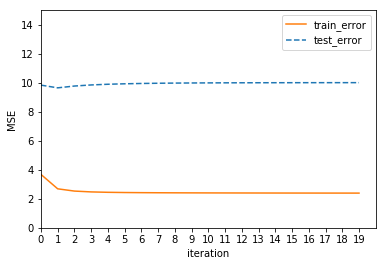

In [29]:
# 예제 12-14 반복 횟수에 따른 학습-평가 에러 변화 플롯하기
from matplotlib import pyplot as plt

x=range(0,20)

plt.xlim(0,20) # x축의 표시 범위를 0-20까지 설정(20은 반복 횟수입니다)
plt.ylim(0,15) # y축의 표시 범위를 0-15까지 설정
plt.xlabel('iteration')
plt.ylabel('MSE')
plt.xticks(x, range(0,20)) # x축에 표시할 숫자를 0부터 19까지의 정수로 함
# 평가 에러를 점선으로 표시
test_plot, = plt.plot(x,test_errors, '--', label='test_error')
# 학습 에러를 실선으로 표시
train_plot, = plt.plot(x,train_errors, label='train_error')
plt.legend(handles=[train_plot, test_plot]) # 범례 생성
plt.show()

In [36]:
R_hat, train_errors = compute_ALS(train, train,20, 50,100)
R_hat, test_errors = compute_ALS(train, test,20, 50,100)

iteration 0 is completed
iteration 10 is completed
Error of rated movies: 5.47677
iteration 0 is completed
iteration 10 is completed
Error of rated movies: 9.05617


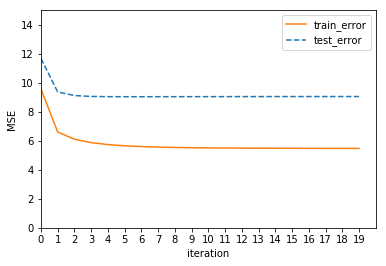

In [37]:
plt.clf()
from matplotlib import pyplot as plt

x=range(0,20)

plt.xlim(0,20) # x축의 표시 범위를 0-20까지 설정(20은 반복 횟수입니다)
plt.ylim(0,15) # y축의 표시 범위를 0-15까지 설정
plt.xlabel('iteration')
plt.ylabel('MSE')
plt.xticks(x, range(0,20)) # x축에 표시할 숫자를 0부터 19까지의 정수로 함
# 평가 에러를 점선으로 표시
test_plot, = plt.plot(x,test_errors, '--', label='test_error')
# 학습 에러를 실선으로 표시
train_plot, = plt.plot(x,train_errors, label='train_error')
plt.legend(handles=[train_plot, test_plot]) # 범례 생성
plt.show()

In [38]:
# 예제 12-15 사용자에게 영화 추천하기
# X, Y를 임의의 수로 초기화하므로 추천 결과가 그때그때 달라질 수 있습니다.

# 근사 행렬의 가장 작은 값을 0으로 만들기 위해 전체 항의 값에서 작은 값을 뺍니다.
R_hat -= np.min(R_hat)

# 근사 행렬의 가장 큰 값을 5로 만들고자 5를 가장 큰 예측값(np.max(R_hat))으로 나눈 값을 곱합니다.
# 예를 들어 가장 큰 예측값이 3일 경우 3을 5로 만들기 위해서는 5/3을 곱하면 됩니다.
# 위에서 구한 값을 예측 행렬의 모든 항에 곱합니다.
R_hat *= float(5) / np.max(R_hat)

def recommend_by_user(user):
    # 사용자의 ID를 입력으로 받아 그 사용자가 보지 않은 영화를 추천합니다.
    user_index = user-1
    user_seen_movies = sorted(list(enumerate(R_hat[user_index])),key=lambda x:x[1], reverse=True)
    recommended=1
    print("-----recommendation for user %d------"%(user))
    for movie_info in user_seen_movies:
        if W[user][movie_info[0]]==0:
            movie_title= movie_info_li[int(movie_info[0]+1)]
            movie_score= movie_info[1]
            print("rank %d recommendation:%s(%.3f)"%(recommended,movie_title[0], movie_score))
            recommended+=1
        if recommended==6:
            break

In [43]:
recommend_by_user(1)

-----recommendation for user 1------
rank 1 recommendation:So I Married an Axe Murderer (1993)(6.426)
rank 2 recommendation:Wrong Trousers, The (1993)(6.422)
rank 3 recommendation:French Twist (Gazon maudit) (1995)(6.259)
rank 4 recommendation:Nikita (La Femme Nikita) (1990)(6.203)
rank 5 recommendation:Full Monty, The (1997)(5.728)
